# Black-Scholes Model





### Call option
$$C=S_tN(d1)+e^{-r(T-t)}KN(d2)$$
$$d1=\frac{\ln{\frac{S_t}{K}}+(r+\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$
$$d2=\frac{\ln{\frac{S_t}{K}}+(r-\frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}=d1-\sigma\sqrt{T-t}$$

In [48]:
#import packages
import numpy as np
from scipy.stats import norm

#parameter setting
T = 250 #maturity T
t = 50 #time t
delta_t = (T - t)/ 365 #annualized the time to maturity
S = 12500 #Strike price
K = 12400 #Exercise price
r = 0.01 #risk-free rate
sigma = 0.05 #volatility

#find the d1 and d2
d1 = (np.log(S/K) + (r + sigma**2/2)*(delta_t)) / (sigma*np.sqrt(delta_t))
d2 = d1 - sigma * np.sqrt(delta_t)

print('d1:　', d1)
print('d2:　', d2)

#call price
call = S * norm.cdf(d1) - K * np.exp(-r*(delta_t)) * norm.cdf(d2)
print('call: ', call)

d1:　 0.38356980106629684
d2:　 0.3465581405564166
call:  279.2798523153888


### Put option
$$P=e^{-r(T-t)}KN(-d2)-S_tN(-d1)$$
where $d1$ and $d2$ are same as call option

In [49]:
#parameter setting
T = 250 #maturity T
t = 50 #time t
delta_t = (T - t)/ 365 #annualized the time to maturity
S = 12500 #Strike price
K = 12400 #Exercise price
r = 0.01 #risk-free rate
sigma = 0.05 #volatility

#find the d1 and d2
d1 = (np.log(S/K) + (r + sigma**2/2)*(delta_t)) / (sigma*np.sqrt(delta_t))
d2 = d1 - sigma* np.sqrt(delta_t)
print('d1:　', d1)
print('d2:　', d2)

#put price
put = K * np.exp(-r*(delta_t)) * norm.cdf(-d2) - S * norm.cdf(-d1)
print('put: ', put)

d1:　 0.38356980106629684
d2:　 0.3465581405564166
put:  111.52045854679363


In [50]:
def option_price(S, K, sigma, T, t, r):
  delta_t = (T-t)/365

  d1 = (np.log(S/K) + (r + sigma**2/2)*(delta_t)) / (sigma*np.sqrt(delta_t)) #d1
  d2 = d1 - sigma * np.sqrt(delta_t) #d2

  call = S * norm.cdf(d1) - K * np.exp(-r*(delta_t)) * norm.cdf(d2) #call price
  put = K * np.exp(-r*(delta_t)) * norm.cdf(-d2) - S * norm.cdf(-d1) #put price

  return call, put

#parameter setting
T = 250 #maturity T
t = 50 #time t
S = 12500 #Strike price
K = 12400 #Exercise price
r = 0.01 #risk-free rate
sigma = 0.05 #volatility

call, put = option_price(S, K, sigma, T, t, r)
print('call: ', call)
print('put: ', put)

call:  279.2798523153888
put:  111.52045854679363


## Fixed the underlying price $S$ based on different strike price $K$

In [51]:
#parameter setting
T = 250 #maturity T
t = 50 #time t
S = 12500 #Strike price
K = 12400 #Exercise price
r = 0.01 #risk-free rate
sigma = 0.05 #volatility

K_ls = np.arange(S-2000, S+2000)#strike price array
price_ls = np.array(list(map(lambda i: option_price(S, i, sigma, T, t, r), K_ls)))
print('K: ', K_ls)
print('Pirce: ', price_ls)

K:  [10500 10501 10502 ... 14497 14498 14499]
Pirce:  [[2.05737695e+03 4.77385430e-05]
 [2.05638242e+03 4.83873759e-05]
 [2.05538788e+03 4.90446600e-05]
 ...
 [6.64400351e-03 1.91778826e+03]
 [6.59117541e-03 1.91878275e+03]
 [6.53875023e-03 1.91977723e+03]]


### Theoretical call price and under different strike price

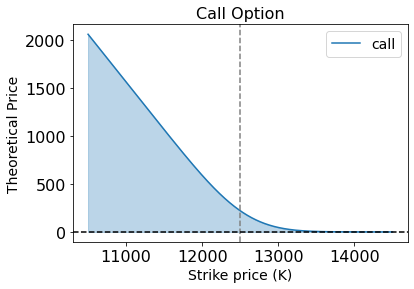

In [54]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

x=K_ls
y=price_ls[:,:1].flatten(order='C')#convert array into one dimension
plt.plot(x, y, label='call')
plt.fill_between(x=x, y1=y, y2=0, color='C0', alpha=0.3)
plt.axvline(S, linestyle='--', color='grey') #strike price line
plt.axhline(0, linestyle='--', color='black') #0 line
plt.xlabel('Strike price (K)', fontsize=14)
plt.ylabel('Theoretical Price', fontsize=14)
plt.title('Call Option', fontsize=16)
plt.legend(fontsize=14)
# plt.savefig('/CallOption.png', bbox_inches='tight')#save fig
plt.show()

### Theoretical put price and under different strike price

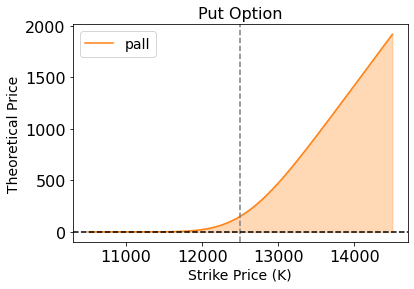

In [53]:
x=K_ls
y=price_ls[:,1:].flatten(order='C')#convert array into one dimension
plt.plot(x, y, label='pall', color='C1')
plt.fill_between(x=x, y1=y, y2=0, color='C1', alpha=0.3)
plt.axvline(S, linestyle='--', color='grey') #strike price line
plt.axhline(0, linestyle='--', color='black') #0 line
plt.xlabel('Strike Price (K)', fontsize=14)
plt.ylabel('Theoretical Price', fontsize=14)
plt.title('Put Option', fontsize=16)
plt.legend(fontsize=14)
# plt.savefig('/PutOption.png', bbox_inches='tight')#save fig
plt.show()